In [1]:
import random as r
import matplotlib.pyplot as plt
import numpy as np

## Declaration of decks

In [2]:
poker_1 = [1,2,3,4,5,6,7,8,9,10,11,12,13,
           1,2,3,4,5,6,7,8,9,10,11,12,13,
           1,2,3,4,5,6,7,8,9,10,11,12,13,
           1,2,3,4,5,6,7,8,9,10,11,12,13]

#This is the Poker deck with four 10s named in every exercise of the Lab.
poker_2 = [1,2,3,4,5,6,7,8,9,10,10,10,10,
           1,2,3,4,5,6,7,8,9,10,10,10,10,
           1,2,3,4,5,6,7,8,9,10,10,10,10,
           1,2,3,4,5,6,7,8,9,10,10,10,10] 

spanish_1 = [1,2,3,4,5,6,7,8,9,10,11,12,
             1,2,3,4,5,6,7,8,9,10,11,12,
             1,2,3,4,5,6,7,8,9,10,11,12,
             1,2,3,4,5,6,7,8,9,10,11,12]

#This is the Spanish deck with three 10s named in every exercise of the Lab.
spanish_2 = [1,2,3,4,5,6,7,8,9,10,10,10,
             1,2,3,4,5,6,7,8,9,10,10,10,
             1,2,3,4,5,6,7,8,9,10,10,10,
             1,2,3,4,5,6,7,8,9,10,10,10]

# 1.
Estimate the probability of getting a 21, the average number of cards required to complete 21 and plot the experimental distribution of the number of card required to complete 21 drawing cards sequentially from a shuffled Spanish 48-card deck with card values 
* [1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12] 
 
 and from a shuffled Poker 52-card with card values
 

* [1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13] 

using Montecarlo with 10 million simulations.


In [3]:
def blackjack(n: int, deck: list, ret: bool):
    done = 0
    count = 0
    copy = deck[:]
    left = len(deck)
    cards_arr = []
    card_count = 0
    
    for j in range (n):
        while count <= 21:
            if count == 21:
                done += 1
                cards_arr.append(card_count)
                break
            elif count < 21:
                index = r.randint(0, left-1)
                count += copy[index]
                copy.pop(index)
                left = len(copy)
                card_count += 1
        card_count = 0
        count = 0
        copy = deck[:]
        left = len(deck)
    
    if ret:
        return len(cards_arr) > 0
    else:
        print("Probability of getting a blackjack with given conditions: %s" % (done/n))
        plt.hist(cards_arr, bins=np.arange(2,10)-0.5, rwidth=0.5, density=True)
        plt.xlabel('Cards required to sum 21')
        plt.ylabel('Percentage over successful tests')
    
    

Probability of getting a blackjack with given conditions: 0.157863


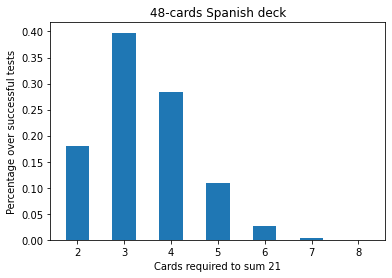

In [4]:
blackjack(10000000, spanish_1, False)
plt.title('48-cards Spanish deck');

Probability of getting a blackjack with given conditions: 0.1447587


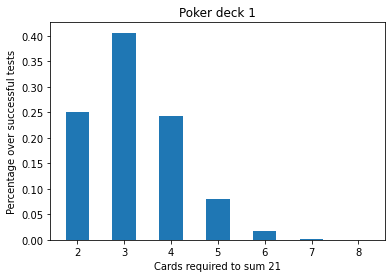

In [5]:
blackjack(10000000, poker_1, False)
plt.title('Poker deck 1');

# 2.
Estimate the probability of getting a 21, the average number of cards required to complete 21 and plot the experimental distribution of the number of card required to complete 21 drawing cards sequentially from a shuffled Spanish 48-card deck with card values 
* [1,2,3,4,5,6,7,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10] 

and from a shuffled Poker 52-card deck with card values 

* [1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10,1,2,3,4,5,6,7,8,9,10,10,10,10] 

using Montecarlo with 10 million simulations.

Probability of getting a blackjack with given conditions: 0.1494155


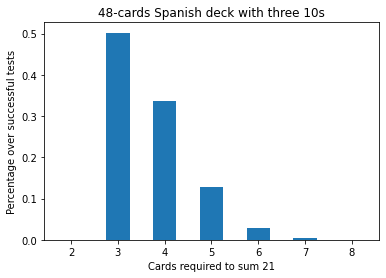

In [6]:
blackjack(10000000, spanish_2, False)
plt.title('48-cards Spanish deck with three 10s');

Probability of getting a blackjack with given conditions: 0.140061


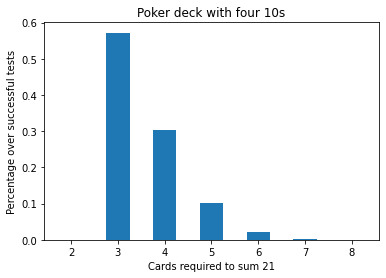

In [7]:
blackjack(10000000, poker_2, False)
plt.title('Poker deck with four 10s');

# 3.
Estimate the probability of getting a 21, the average total number of cards required to complete 21 (including the three that you start with) and plot the experimental distribution of the number of card required to complete 21 with drawing cards sequentially from a shuffled Spanish 48-card deck with 3 10’s and a shuffled Poker 52-card deck with 4 10’s, assuming that you have in your hand the cards [7,7,5] and the remaining deck has n/2 cards. You can pick the n/2 cards in the remaining deck in whatever way you choose but with restriction that this has maximum two 7s and three 5, you have to keep the remaining deck fixed through the simulations, use Montecarlo with 10 million simulations.

In [8]:
def three_to_go(n: int, deck: list):
    done = 0
    count = 19
    copy = deck[:]
    left = len(copy)
    cards_arr = []
    card_count = 3
    
    copy.remove(7)
    copy.remove(7)
    copy.remove(5)
    left = len(copy)
    
    while len(copy) > len(deck)/2:
        index = r.randint(0, left-1)
        copy.pop(index)
        left = len(copy)      
        
    half_deck = copy[:] 
    
    for h in range (n):
        while count <= 21:
            if count == 21:
                done += 1
                cards_arr.append(card_count)
                break
            elif count < 21:
                index = r.randint(0, left-1)
                count += half_deck[index]
                half_deck.pop(index)
                left = len(half_deck)
                card_count += 1
        card_count = 3        
        count = 19
        half_deck = copy[:]
        left = len(half_deck)
        
    print("Probability of getting a blackjack with given conditions: %s" % (done/n))
    plt.hist(cards_arr, bins=np.arange(4,8)-0.5, rwidth=0.5, density=True)
    plt.xlabel('Cards required to sum 21')
    plt.ylabel('Percentage over successful tests')

Probability of getting a blackjack with given conditions: 0.1286551


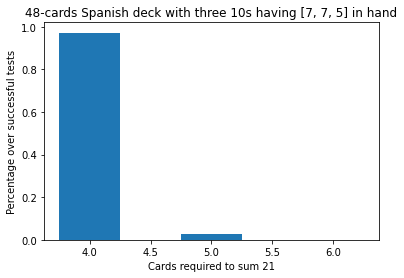

In [9]:
three_to_go(10000000, spanish_2) #Spanish dech with three 10s
plt.title('48-cards Spanish deck with three 10s having [7, 7, 5] in hand');

Probability of getting a blackjack with given conditions: 0.0800913


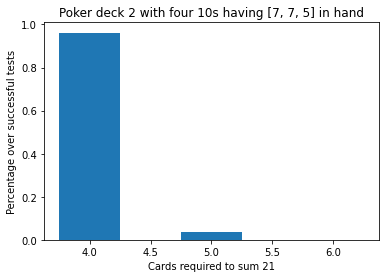

In [10]:
three_to_go(10000000, poker_2) #Poker deck with four 10s
plt.title('Poker deck 2 with four 10s having [7, 7, 5] in hand');

# 4.
Find two remaining decks with 12 cards for Alg Gr 1 9-11 and with 10 cards for Alg Gr 2 11-1; for a Spanish 48-card deck with 3 10’s and for a Poker 52-card deck with 4 10’s; one remaining has the highest probability of getting 21 (hot deck) and the other remaining s that has the lowest probability of getting 21(cold deck), assuming that you have in your hand the cards [7,7,5]. Calculate analytically the probabilities of getting a 21 for both the hot an cold deck, estimate this probabilities of getting a 21, the average total number of cards required to complete 21 (including the three that you start with) and plot the experimental distribution of the total number of card required to complete 21 (including the three that you start with) using Montecarlo with 10 million simulations.

In [11]:
""" Note that both Spanish and Poker hot decks are the same, 
    because they both need to have all 1s and 2s, and no matter the remaining 4 cards you choose, 
    they will be greater than 2, so it is not needed to generate a new hot deck every time"""

hot_deck = [1,1,1,1,2,2,2,2,3,3,4,4]

""" Note that both Spanish and Poker cold decks are the same, 
    because they both need to have all just two 1s and no 2s, and no matter the remaining 8 cards you choose, 
    they will be greater than 2, so it is not needed to generate a new hot deck every time"""

cold_deck = [1,1,3,3,3,3,4,4,4,4,5,5]

""" The least possible probability for a cold deck to sum 21 is 0, if all 12 cards are different to 1 or 2"""


' The least possible probability for a cold deck to sum 21 is 0, if all 12 cards are different to 1 or 2'

In [12]:
def hot_or_cold(n: int, deck: list, ret: bool):
    done = 0
    count = 19
    copy = deck[:]
    left = len(copy)
    cards_arr = []
    card_count = 3
    
    for h in range (n):    
        while count <= 21:
            if count == 21:
                done += 1
                cards_arr.append(card_count)
                break
            elif count < 21:
                index = r.randint(0, left-1)
                count += copy[index]
                copy.pop(index)
                left = len(copy)
                card_count += 1       
        card_count = 3        
        count = 19
        copy = deck[:]
        left = len(copy)
    
    if ret:
        return len(cards_arr) > 0
    else:
        print('Average cards required to sum 21: %s' %(np.mean(cards_arr)))
        print("Probability of winning a hand with a deck with %s cards left: %s" % (12, done/n))
        plt.hist(cards_arr, bins=np.arange(4,8)-0.5, rwidth=0.5, density=True)
        plt.xlabel('Cards required to sum 21')
        plt.ylabel('Percentage over successful tests')   
    

Average cards required to sum 21: 4.2143892937417355
Probability of winning a hand with a deck with 12 cards left: 0.4240361


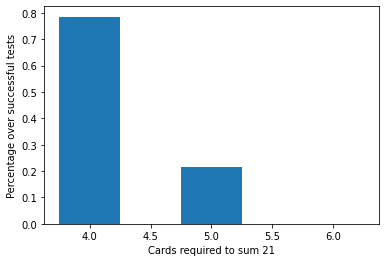

In [13]:
hot_or_cold(10000000, hot_deck, False)

Average cards required to sum 21: 5.0
Probability of winning a hand with a deck with 12 cards left: 0.0151318


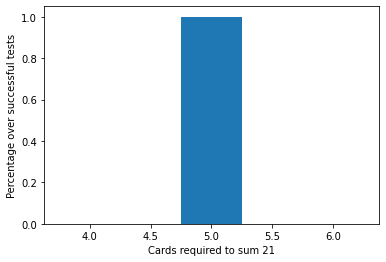

In [14]:
hot_or_cold(10000000, cold_deck, False)

# 5.
Estimate the average amount of money (expected value) that Ben wins or losses on a weekend if Ben goes to Vegas every weekend (Friday, Saturday and Sunday), plays every weekend day 10 hours, each game takes 3 mins. Assume that for each game he gets two possibilities, in one he gets in his hand the cards [7,7,5] and a remaining hot deck cards with 12 cards for Alg Gr 1 9-11 and with 10 cards for Alg Gr 2 11-1 which case he bets \\$1000 this happens with probability 1/10; in the other one he gets no cards in his hand a complete shuffled deck in which case he bets \\$10, this happens with the remaining probability 9/10. Use 10000 Montecarlo simulations to estimated the expected amount of money that Ben wins or losses on a weekend for a Spanish 48-card deck with 3 10’s and for a Poker 52-card deck with 4 10’s.

In [15]:
import pandas as pd

In [21]:
def weekend(n: int, deck: list):
    prizes_arr = []
    games_per_weekend= (60/3)*(10)*(3)
    
    for h in range (n):
        prizes = 0
        for x in range(int(games_per_weekend)):
            rand = r.random()
            if (rand <= 0.1): 
                if hot_or_cold(1, hot_deck, True):
                    prizes += 1000
                else:
                    prizes -= 1000  
            else:
                if blackjack(1, deck, True):
                    prizes += 10
                else:
                    prizes -= 10 
        prizes_arr.append(prizes)  
    
    tests = np.arange(0, n)
    data = pd.Series(prizes_arr, tests)
   
    print("Money earned or lost on average by Ben in %s weekends: %s " % (n, np.mean(prizes_arr)))
    data.plot();
    plt.title('Earnings of Ben playing blackjack during weekend')
    plt.xlabel('Weekends played')
    plt.ylabel('Earnings')

Money earned or lost on average by Ben in 10000 weekends: -12857.18 


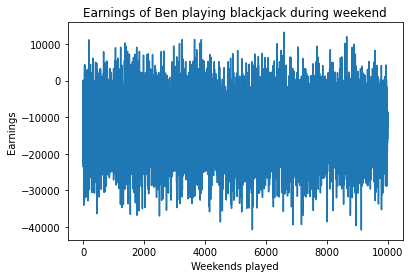

In [22]:
weekend(10000, spanish_2)

Money earned or lost on average by Ben in 10000 weekends: -12924.374 


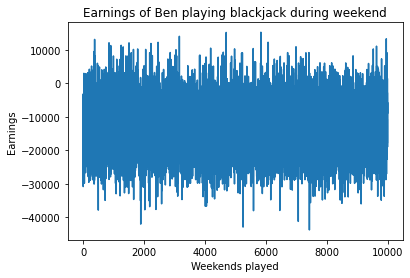

In [23]:
weekend(10000, poker_2)